In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel('data - Promotional Effectiveness Case Study.xlsx')
print(data.head())

   Year  week number  Product  Price On Flyer?  Discount  Units    Sales $  \
0  2021            1  Pantene   7.99        No      0.00   8630   68953.70   
1  2021            2  Pantene   7.29       Yes      0.10  10183   74234.07   
2  2021            3  Pantene   5.49       Yes      0.30  21568  118408.32   
3  2021            4  Pantene   7.49       Yes      0.05   9309   69724.41   
4  2021            5  Pantene   7.99        No      0.00   8462   67611.38   

   Gross Margin $  # Transactions that contained the product  
0        33570.70                                       8460  
1        32483.77                                       9983  
2        29979.52                                      17117  
3        31557.51                                       9038  
4        32917.18                                       8379  


In [3]:
#Split the dataset by product
aussie_data = data[data['Product'] == 'Aussie']
pantene_data = data[data['Product'] == 'Pantene']

Question 1: What price point is most effective at maximizing sales?

In [4]:
aussie_sales_data = aussie_data.groupby(['Product', 'Price']).agg({'Sales $': 'mean'}).reset_index()
aussie_sales_data

,Product,Price,Sales $
0,Aussie,2.49,192228.000000
1,Aussie,2.99,170709.066667
2,Aussie,3.29,152944.580000
3,Aussie,3.49,124416.948889
4,Aussie,3.99,89367.022500
5,Aussie,4.29,66224.730000
6,Aussie,4.49,56708.700000
7,Aussie,4.79,55223.910000
8,Aussie,4.99,54437.630690


In [5]:
aussie_sales_data.loc[aussie_sales_data['Sales $'].idxmax()]

Product      Aussie
Price          2.49
Sales $    192228.0
Name: 0, dtype: object

In [6]:
pantene_sales_data = pantene_data.groupby(['Product', 'Price']).agg({'Sales $': 'mean'}).reset_index()
pantene_sales_data

,Product,Price,Sales $
0,Pantene,3.99,224121.791250
1,Pantene,4.49,184342.936667
2,Pantene,4.79,156176.034000
3,Pantene,5.29,147813.180000
4,Pantene,5.49,113200.662857
5,Pantene,6.49,92408.946667
6,Pantene,6.79,87472.660000
7,Pantene,7.29,74234.070000
8,Pantene,7.49,70188.790000
9,Pantene,7.99,69003.352143


In [7]:
pantene_sales_data.loc[pantene_sales_data['Sales $'].idxmax()]

Product         Pantene
Price              3.99
Sales $    224121.79125
Name: 0, dtype: object

For Aussie, 2.49 will maximize the sales.For Pantene, 3.99 will maximize the sales. 

Question 2: What price point is most effective at maximizing gross margin?

In [8]:
aussie_margin_data = aussie_data.groupby(['Product', 'Price']).agg({'Gross Margin $': 'mean'}).reset_index()
aussie_margin_data

,Product,Price,Gross Margin $
0,Aussie,2.49,-23932.000000
1,Aussie,2.99,10847.733333
2,Aussie,3.29,22778.980000
3,Aussie,3.49,24598.193333
4,Aussie,3.99,26653.322500
5,Aussie,4.29,23264.139503
6,Aussie,4.49,21339.947228
7,Aussie,4.79,22942.710000
8,Aussie,4.99,23891.465172


In [9]:
aussie_margin_data.loc[aussie_margin_data['Gross Margin $'].idxmax()]

Product               Aussie
Price                   3.99
Gross Margin $    26653.3225
Name: 4, dtype: object

In [10]:
pantene_margin_data = pantene_data.groupby(['Product', 'Price']).agg({'Gross Margin $': 'mean'}).reset_index()
pantene_margin_data

,Product,Price,Gross Margin $
0,Pantene,3.99,-6178.796250
1,Pantene,4.49,16011.970000
2,Pantene,4.79,22497.174000
3,Pantene,5.29,33250.980000
4,Pantene,5.49,28661.005714
5,Pantene,6.49,34030.413333
6,Pantene,6.79,34654.117143
7,Pantene,7.29,32483.770000
8,Pantene,7.49,31767.690000
9,Pantene,7.99,33594.873571


In [11]:
pantene_margin_data.loc[pantene_margin_data['Gross Margin $'].idxmax()]

Product                Pantene
Price                     6.79
Gross Margin $    34654.117143
Name: 6, dtype: object

For Aussie, 3.99 will maximize the gross margin. For Pantene, 6.79 will maximize the gross margin. 

Question 3: Is Shampoo seasonal (influenced by time of year)? Explain why or why not.

In [12]:
#Create year week column
aussie_data['Year-Week'] = aussie_data['Year'].astype(str) + '-' + aussie_data['week number'].astype(str)

#Select columns to focus on sales impact without discount and flyer influence
analysis_aussie_data = aussie_data[['Year', 'Year-Week', 'Product', 'Price', 'Units', 'Sales $']]

#Initialize MinMaxScaler
scaler = MinMaxScaler()

#Scale the Sales data
analysis_aussie_data['Normalized_Sales'] = scaler.fit_transform(analysis_aussie_data[['Sales $']])

analysis_aussie_data

/var/folders/v9/_qnmdykd79g5g0_rs7scxqxr0000gn/T/ipykernel_19272/1083329218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aussie_data['Year-Week'] = aussie_data['Year'].astype(str) + '-' + aussie_data['week number'].astype(str)
/var/folders/v9/_qnmdykd79g5g0_rs7scxqxr0000gn/T/ipykernel_19272/1083329218.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_aussie_data['Normalized_Sales'] = scaler.fit_transform(analysis_aussie_data[['Sales $']])


,Year,Year-Week,Product,Price,Units,Sales $,Normalized_Sales
67,2021,2021-1,Aussie,4.99,10980,54790.20,0.050471
68,2021,2021-2,Aussie,3.99,23510,93804.90,0.320016
69,2021,2021-3,Aussie,2.99,57084,170681.16,0.851137
70,2021,2021-4,Aussie,4.99,11195,55863.05,0.057883
71,2021,2021-5,Aussie,3.99,23058,92001.42,0.307556
...,...,...,...,...,...,...,...
129,2022,2022-11,Aussie,4.29,14757,63307.53,0.109316
130,2022,2022-12,Aussie,4.99,10873,54256.27,0.046782
131,2022,2022-13,Aussie,4.49,12630,56708.70,0.063726
132,2022,2022-14,Aussie,4.99,10767,53727.33,0.043128


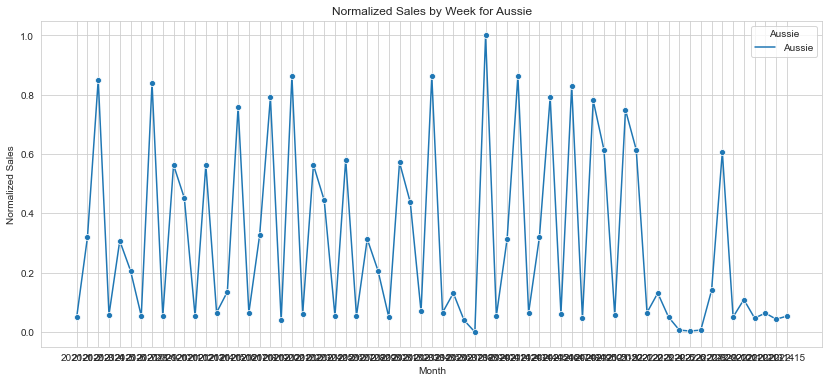

In [13]:
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))
sns.lineplot(data=analysis_aussie_data, x='Year-Week', y='Normalized_Sales', hue='Product', marker='o')
plt.title('Normalized Sales by Week for Aussie')
plt.xlabel('Month')
plt.ylabel('Normalized Sales')
plt.legend(title='Aussie')
plt.show()

In [14]:
#ANOVA Test by week for Aussie to see if there is seasonality
week_model = ols('Normalized_Sales ~ Year-Week', data=analysis_aussie_data).fit()
week_anova = sm.stats.anova_lm(week_model, typ=2)
print(week_anova)

           sum_sq    df         F    PR(>F)
Year      0.57612   1.0  6.555519  0.012788
Residual  5.71241  65.0       NaN       NaN


Since the P-value is 0.012, if we set the confident interval is 95%, then the P-value is still large than 0.05 so we reject the hypothesis, there is no seasonlity for Aussie

In [15]:
#Create year week column
pantene_data['Year-Week'] = pantene_data['Year'].astype(str) + '-' + pantene_data['week number'].astype(str)

#Select columns to focus on sales impact without discount and flyer influence
analysis_pantene_data = pantene_data[['Year', 'Year-Week', 'Product', 'Price', 'Units', 'Sales $']]

#Initialize MinMaxScaler
scaler = MinMaxScaler()

#Scale the Sales data
analysis_pantene_data['Normalized_Sales'] = scaler.fit_transform(analysis_pantene_data[['Sales $']])

analysis_pantene_data

/var/folders/v9/_qnmdykd79g5g0_rs7scxqxr0000gn/T/ipykernel_19272/2315148616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pantene_data['Year-Week'] = pantene_data['Year'].astype(str) + '-' + pantene_data['week number'].astype(str)
/var/folders/v9/_qnmdykd79g5g0_rs7scxqxr0000gn/T/ipykernel_19272/2315148616.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_pantene_data['Normalized_Sales'] = scaler.fit_transform(analysis_pantene_data[['Sales $']])


,Year,Year-Week,Product,Price,Units,Sales $,Normalized_Sales
0,2021,2021-1,Pantene,7.99,8630,68953.70,0.012011
1,2021,2021-2,Pantene,7.29,10183,74234.07,0.043889
2,2021,2021-3,Pantene,5.49,21568,118408.32,0.310576
3,2021,2021-4,Pantene,7.49,9309,69724.41,0.016664
4,2021,2021-5,Pantene,7.99,8462,67611.38,0.003907
...,...,...,...,...,...,...,...
62,2022,2022-11,Pantene,7.99,8883,70975.17,0.024215
63,2022,2022-12,Pantene,3.99,55008,219481.92,0.920774
64,2022,2022-13,Pantene,7.99,8798,70296.02,0.020115
65,2022,2022-14,Pantene,6.79,13118,89071.22,0.133464


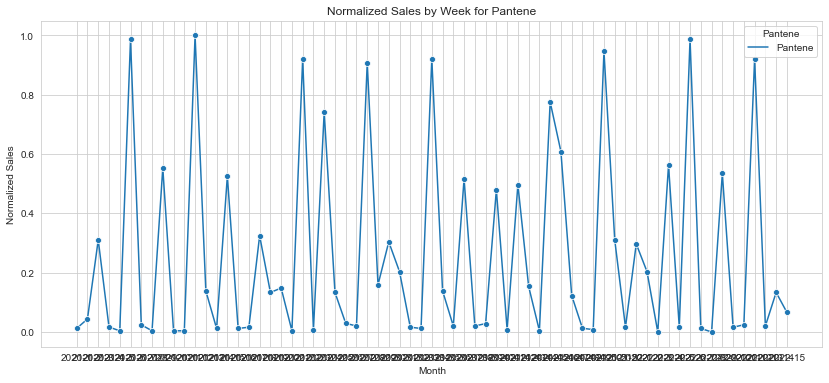

In [16]:
#Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))
sns.lineplot(data=analysis_pantene_data, x='Year-Week', y='Normalized_Sales', hue='Product', marker='o')
plt.title('Normalized Sales by Week for Pantene')
plt.xlabel('Month')
plt.ylabel('Normalized Sales')
plt.legend(title='Pantene')
plt.show()

In [17]:
#ANOVA Test by week for Pantene to see if there is seasonality
week_model = ols('Normalized_Sales ~ Year-Week', data=analysis_pantene_data).fit()
week_anova = sm.stats.anova_lm(week_model, typ=2)
print(week_anova)

            sum_sq    df         F    PR(>F)
Year      0.000125   1.0  0.001153  0.973016
Residual  7.043296  65.0       NaN       NaN


Since the P-value is 0.97 large than 0.05 so we reject the hypothesis, there is no seasonlity for Pantene

Question 4: What is the cost per unit of each product?

In [18]:
#Calculate the cost per unit for Pantene and Aussie
data['Cost per Unit'] = (data['Sales $'] - data['Gross Margin $']) / data['Units']

#Separate cost per unit data for Aussie and Pantene
aussie_cost_per_unit = data[data['Product'] == 'Aussie'][['Year', 'week number', 'Cost per Unit']]
pantene_cost_per_unit = data[data['Product'] == 'Pantene'][['Year', 'week number', 'Cost per Unit']]

In [19]:
aussie_cost_per_unit['Cost per Unit'].unique()

array([2.8       , 2.8       , 2.8       , 2.8       , 2.8       ,
       2.7829624 , 2.8       , 2.7829624 , 2.80037631])

In [20]:
round(aussie_cost_per_unit['Cost per Unit'],1).unique()

array([2.8])

In [21]:
#Display the cost per unit data
round(pantene_cost_per_unit['Cost per Unit'],1).unique()

array([4.1])

There are typo error for Aussie, how ever if we round to 1 decimal, the cost will be same

So the cost for Pantene is consistenly 4.1, and cost for Aussie is consistenly 2.8

Question 5: How would Pantene perform for units, sales and margin with a 25% discount?

In [22]:
#Take a look for Pantene's perfomance when discount rate is 20%
pantene_data[pantene_data['Discount'] == 0.2]

,Year,week number,Product,Price,On Flyer?,Discount,Units,Sales $,Gross Margin $,# Transactions that contained the product,Year-Week
19,2021,20,Pantene,6.49,Yes,0.2,14099,91502.51,33696.61,12691,2021-20
28,2021,29,Pantene,6.49,Yes,0.2,14378,93313.22,34363.42,12691,2021-29
42,2021,43,Pantene,6.49,Yes,0.2,14239,92411.11,34031.21,12447,2021-43


In [23]:
pantene_data[pantene_data['Discount'] == 0.2].describe()

,Year,week number,Price,Discount,Units,Sales $,Gross Margin $,# Transactions that contained the product
count,3.0,3.000000,3.000000e+00,3.000000e+00,3.000000,3.000000,3.000000,3.000000
mean,2021.0,30.666667,6.490000e+00,2.000000e-01,14238.666667,92408.946667,34030.413333,12609.666667
std,0.0,11.590226,1.087792e-15,3.399350e-17,139.500299,905.356938,333.405714,140.873466
min,2021.0,20.000000,6.490000e+00,2.000000e-01,14099.000000,91502.510000,33696.610000,12447.000000
25%,2021.0,24.500000,6.490000e+00,2.000000e-01,14169.000000,91956.810000,33863.910000,12569.000000
50%,2021.0,29.000000,6.490000e+00,2.000000e-01,14239.000000,92411.110000,34031.210000,12691.000000
75%,2021.0,36.000000,6.490000e+00,2.000000e-01,14308.500000,92862.165000,34197.315000,12691.000000
max,2021.0,43.000000,6.490000e+00,2.000000e-01,14378.000000,93313.220000,34363.420000,12691.000000


In [24]:
#Take a look for Pantene's perfomance when discount rate is 30%
pantene_data[pantene_data['Discount'] == 0.3]

,Year,week number,Product,Price,On Flyer?,Discount,Units,Sales $,Gross Margin $,# Transactions that contained the product,Year-Week
2,2021,3,Pantene,5.49,Yes,0.3,21568,118408.32,29979.52,17117,2021-3
17,2021,18,Pantene,5.49,Yes,0.3,21995,120752.55,30573.05,17795,2021-18
29,2021,30,Pantene,5.49,Yes,0.3,21363,117282.87,29694.57,17117,2021-30
30,2021,31,Pantene,5.49,No,0.3,18339,100681.11,25491.21,14838,2021-31
50,2021,51,Pantene,5.49,Yes,0.3,21576,118452.24,29990.64,17456,2021-51
52,2022,1,Pantene,5.49,Yes,0.3,21157,116151.93,29408.23,17117,2022-1
53,2022,2,Pantene,5.49,No,0.3,18338,100675.62,25489.82,14694,2022-2


In [25]:
pantene_data[pantene_data['Discount'] == 0.3].describe()

,Year,week number,Price,Discount,Units,Sales $,Gross Margin $,# Transactions that contained the product
count,7.000000,7.000000,7.000000e+00,7.0,7.000000,7.000000,7.000000,7.000000
mean,2021.285714,19.428571,5.490000e+00,0.3,20619.428571,113200.662857,28661.005714,16590.571429
std,0.487950,18.963624,9.593423e-16,0.0,1578.721303,8667.179953,2194.422611,1271.448368
min,2021.000000,1.000000,5.490000e+00,0.3,18338.000000,100675.620000,25489.820000,14694.000000
25%,2021.000000,2.500000,5.490000e+00,0.3,19748.000000,108416.520000,27449.720000,15977.500000
50%,2021.000000,18.000000,5.490000e+00,0.3,21363.000000,117282.870000,29694.570000,17117.000000
75%,2021.500000,30.500000,5.490000e+00,0.3,21572.000000,118430.280000,29985.080000,17286.500000
max,2022.000000,51.000000,5.490000e+00,0.3,21995.000000,120752.550000,30573.050000,17795.000000


In [26]:
from sklearn.linear_model import LinearRegression

#Group data by Discount and calculate average Units, Sales $ and Gross Margin $
discount_groups = pantene_data.groupby('Discount').agg({
    'Units': 'mean',
    'Sales $': 'mean',
    'Gross Margin $': 'mean'
}).reset_index()

discount_groups = discount_groups.round({
    'Units': 0,  # Rounding units to 0 decimal places for whole numbers
    'Sales $': 2,
    'Gross Margin $': 2
})

discount_groups

,Discount,Units,Sales $,Gross Margin $
0,0.00,8636.0,69003.35,33594.87
1,0.05,9371.0,70188.79,31767.69
2,0.10,10183.0,74234.07,32483.77
3,0.15,12883.0,87472.66,34654.12
4,0.20,14239.0,92408.95,34030.41
5,0.30,20619.0,113200.66,28661.01
6,0.35,27942.0,147813.18,33250.98
7,0.40,32605.0,156176.03,22497.17
8,0.45,41056.0,184342.94,16011.97
9,0.50,56171.0,224121.79,-6178.80


In [27]:
#Fit a linear regression model for each performance metric
X = discount_groups['Discount'].values.reshape(-1, 1) * 100  # Convert discount rate into percentage terms for model
y_units = discount_groups['Units']
y_sales = discount_groups['Sales $']
y_margin = discount_groups['Gross Margin $']

model_units = LinearRegression().fit(np.vander(X.squeeze(), 3), y_units)  # Polynomial degree 2
model_sales = LinearRegression().fit(np.vander(X.squeeze(), 3), y_sales)
model_margin = LinearRegression().fit(np.vander(X.squeeze(), 3), y_margin)

In [28]:
pred_units_25 = model_units.predict(np.vander([25], 3))
pred_sales_25 = model_sales.predict(np.vander([25], 3))
pred_margin_25 = model_margin.predict(np.vander([25], 3))

In [29]:
print(np.round(pred_units_25,decimals=0),np.round(pred_sales_25,2),np.round(pred_margin_25,2))

[16907.] [104065.46] [34746.27]


Based on the linear regression results, if Pantene discount rate is 25%, then the units will be 16907, sales will be 104065.46 and gross margin will be 34746.27

Question 6: How would Pantene perform for units, sales and margin with a 60% discount?

In [30]:
#Calculate new units, sales and margin with a 60% discount
pred_units_60 = model_units.predict(np.vander([60], 3))
pred_sales_60 = model_sales.predict(np.vander([60], 3))
pred_margin_60 = model_margin.predict(np.vander([60], 3))

In [31]:
print(np.round(pred_units_60,0),np.round(pred_sales_60,2),np.round(pred_margin_60,2))

[75491.] [286553.07] [-22962.57]


Based on the linear regression results, if Pantene discount rate is 60%, then the units will be 75491, sales will be 286553.07 and gross margin will be -22962.57

Question 7: What impact does being “On Flyer” have on performance?

In [32]:
#Calculate average metrics for Aussie
aussie_grouped_flyer_data = aussie_data.groupby(['Product', 'On Flyer?', 'Discount']).agg(
    Average_Units_Sold=('Units', 'mean'),
    Average_Sales=('Sales $', 'mean'),
    Average_Gross_Margin=('Gross Margin $', 'mean')
).reset_index()

aussie_grouped_flyer_data = aussie_grouped_flyer_data.round({
    'Average_Units_Sold': 2,  # Rounding units to 0 decimal places for whole numbers
    'Average_Sales': 2,
    'Average_Gross_Margin': 2
})

aussie_grouped_flyer_data

,Product,On Flyer?,Discount,Average_Units_Sold,Average_Sales,Average_Gross_Margin
0,Aussie,No,0.00,10909.34,54437.63,23891.47
1,Aussie,No,0.20,19408.00,77437.92,23095.52
2,Aussie,No,0.30,32041.67,111825.42,22108.75
3,Aussie,No,0.35,41457.50,136395.17,20314.17
4,Aussie,Yes,0.05,11529.00,55223.91,22942.71
5,Aussie,Yes,0.10,12630.00,56708.70,21339.95
6,Aussie,Yes,0.15,15437.00,66224.73,23264.14
7,Aussie,Yes,0.20,23394.33,93343.39,27839.26
8,Aussie,Yes,0.30,37453.50,130712.72,25842.92
9,Aussie,Yes,0.35,48499.80,159564.34,23764.90


In [33]:
aussie_pivot_flyer_data = aussie_grouped_flyer_data.pivot_table(
    index=['Product', 'Discount'],
    columns='On Flyer?',
    values=['Average_Units_Sold', 'Average_Sales', 'Average_Gross_Margin']
)

aussie_pivot_flyer_data

Average_Gross_Margin           Average_Sales             \
On Flyer?                          No       Yes            No        Yes   
Product Discount                                                           
Aussie  0.00                 23891.47       NaN      54437.63        NaN   
        0.05                      NaN  22942.71           NaN   55223.91   
        0.10                      NaN  21339.95           NaN   56708.70   
        0.15                      NaN  23264.14           NaN   66224.73   
        0.20                 23095.52  27839.26      77437.92   93343.39   
        0.30                 22108.75  25842.92     111825.42  130712.72   
        0.35                 20314.17  23764.90     136395.17  159564.34   
        0.40                      NaN  10847.73           NaN  170709.07   
        0.50                      NaN -23932.00           NaN  192228.00   

                 Average_Units_Sold            
On Flyer?                        No       Yes  
Product Discount                               
Aussie  0.00               10909.34       NaN  
        0.05                    NaN  11529.00  
        0.10                    NaN  12630.00  
        0.15                    NaN  15437.00  
        0.20               19408.00  23394.33  
        0.30               32041.67  37453.50  
        0.35               41457.50  48499.80  
        0.40                    NaN  57093.33  
        0.50                    NaN  77200.00

For 20% discount rate, if the product is on flyer, the average units sold will increase 3,986 units, average sales will increase 15,905.47 and average gross margin will increase 4,743.74.
For 30% discount rate, if the product is on flyer, the average units sold will increase 5,412 units, average sales will increase 18,887.3 and average gross margin will increase 3,734.17.
For 35% discount rate, if the product is on flyer, the average units sold will increase 7,042 units, average sales will increase 30,211.16 and average gross margin will increase 3,450.73.

In [34]:
#Calculate average metrics for Pantene
pantene_grouped_flyer_data = pantene_data.groupby(['Product', 'On Flyer?', 'Discount']).agg(
    Average_Units_Sold=('Units', 'mean'),
    Average_Sales=('Sales $', 'mean'),
    Average_Gross_Margin=('Gross Margin $', 'mean')
).reset_index()

pantene_grouped_flyer_data = pantene_grouped_flyer_data.round({
    'Average_Units_Sold': 2,  # Rounding units to 0 decimal places for whole numbers
    'Average_Sales': 2,
    'Average_Gross_Margin': 2
})

pantene_grouped_flyer_data

,Product,On Flyer?,Discount,Average_Units_Sold,Average_Sales,Average_Gross_Margin
0,Pantene,No,0.00,8636.21,69003.35,33594.87
1,Pantene,No,0.15,11477.00,77928.83,30873.13
2,Pantene,No,0.30,18338.50,100678.36,25490.52
3,Pantene,No,0.45,37355.00,167723.95,14568.45
4,Pantene,Yes,0.05,9371.00,70188.79,31767.69
5,Pantene,Yes,0.10,10183.00,74234.07,32483.77
6,Pantene,Yes,0.15,13116.83,89063.30,35284.28
7,Pantene,Yes,0.20,14238.67,92408.95,34030.41
8,Pantene,Yes,0.30,21531.80,118209.58,29929.20
9,Pantene,Yes,0.35,27942.00,147813.18,33250.98


In [35]:
pantene_pivot_flyer_data = pantene_grouped_flyer_data.pivot_table(
    index=['Product', 'Discount'],
    columns='On Flyer?',
    values=['Average_Units_Sold', 'Average_Sales', 'Average_Gross_Margin']
)

pantene_pivot_flyer_data

Average_Gross_Margin           Average_Sales             \
On Flyer?                          No       Yes            No        Yes   
Product Discount                                                           
Pantene 0.00                 33594.87       NaN      69003.35        NaN   
        0.05                      NaN  31767.69           NaN   70188.79   
        0.10                      NaN  32483.77           NaN   74234.07   
        0.15                 30873.13  35284.28      77928.83   89063.30   
        0.20                      NaN  34030.41           NaN   92408.95   
        0.30                 25490.52  29929.20     100678.36  118209.58   
        0.35                      NaN  33250.98           NaN  147813.18   
        0.40                      NaN  22497.17           NaN  156176.03   
        0.45                 14568.45  16733.73     167723.95  192652.43   
        0.50                      NaN  -6178.80           NaN  224121.79   

                 Average_Units_Sold            
On Flyer?                        No       Yes  
Product Discount                               
Pantene 0.00                8636.21       NaN  
        0.05                    NaN   9371.00  
        0.10                    NaN  10183.00  
        0.15               11477.00  13116.83  
        0.20                    NaN  14238.67  
        0.30               18338.50  21531.80  
        0.35                    NaN  27942.00  
        0.40                    NaN  32604.60  
        0.45               37355.00  42907.00  
        0.50                    NaN  56170.88

For 15% discount rate, if the product is on flyer, the average units sold will increase 1640 units, average sales will increase 11,134.47 and average gross margin will increase 4,411.15.
For 30% discount rate, if the product is on flyer, the average units sold will increase 3193 units, average sales will increase 17,531.21 and average gross margin will increase 4,438.68.
For 45% discount rate, if the product is on flyer, the average units sold will increase 5,552 units, average sales will increase 24,928.48 and average gross margin will increase 2165.28.

Question 8: Your director wants to change the price on an upcoming Aussie Shampoo flyer promotion. Her goal is to maximize sales, but she does not want to sacrifice too much margin. 
a.	How would you present the data to help her make the decision?
b.	What price would you recommend?

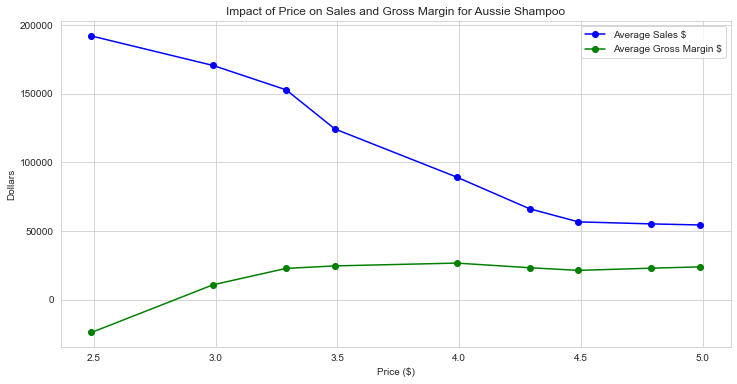

In [36]:
aussie_plot_data = aussie_data.groupby('Price').agg({
    'Sales $': 'mean',
    'Gross Margin $': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(aussie_plot_data['Price'], aussie_plot_data['Sales $'], label='Average Sales $', marker='o', color='blue')
plt.plot(aussie_plot_data['Price'], aussie_plot_data['Gross Margin $'], label='Average Gross Margin $', marker='o', color='green')
plt.title('Impact of Price on Sales and Gross Margin for Aussie Shampoo')
plt.xlabel('Price ($)')
plt.ylabel('Dollars')
plt.legend()
plt.grid(True)
plt.show()

The above graph shows the trend for sales vs price and gross margin vs price. For gross margin, it's clear that after the interval between price = 3.25 and price = 3.5 the gross margin become stable, however in the mean time, the sales drop rapidly after the interval between price = 3.25 and price = 3.5, therefor, the interval between 3.25 and 3.5 is the point of inflection, so I will recommand this interval.

Question 9: Aussie Shampoo sold at 2.49 is a “loss leader” promotion. We lose money selling it at this price, but hope that people who came to buy it will purchase other items.
i.	Is Aussie @ 2.49 an effective loss leader? Explain why or why not.
ii.	Your director proposes to change the promotion to 2 for 5 or pay 2.99 each, hoping that this will improve margin. Will this work? Explain why or why not.

If we sell Aussie at 2.49, we will lose money at this point, but we may attract high number of transaction and increase the store traffic. However, we cannot consider selling Aussie at 2.49 is an effective loss leader because it does not meet the goal which is to bring customer to the store and potentially boosting the sales for other products.

In [37]:
aussie_data.groupby(['Price','# Transactions that contained the product']).agg({'Gross Margin $': 'mean'}).reset_index().head(5)

,Price,# Transactions that contained the product,Gross Margin $
0,2.49,22396,-23932.00
1,2.99,21955,10793.90
2,2.99,22173,10637.53
3,2.99,22390,10954.45
4,2.99,22608,10953.31


Given the cost for unit is $2.8, so the gross margin per unit is 2.5 - 2.8 = -0.3 if we sell 2 for 5, and the gross margin per unit is 2.99 - 2.8 = 0.19 if we sell 2.99 each. In order to find breakeven point that we will made positive margin, let's define x to be percentage of customer who purchuse 2 for 5.

In [38]:
from sympy import symbols, Eq, solve

#Define the variable that x be % of customer who purchase 1 for 2.99
x = symbols('x')

#Equation for break-even point
equation = Eq(-0.30*(1-x) + 0.19*x, 0)

#Solve the equation
break_even_x = solve(equation, x)
break_even_x

[0.612244897959184]

The breakeven point shows if there are less than 38.76% of customer who purchase 2 for 5, which is 61.24% customer who choose to purchase one at 2.99, we will gain positive gross margin.